# Aufgabe 4: Öffnungsfehler plankonvexe Linse (10$\,$pt) ***

Bestimmung der Öffnungsfehler einer plankonvexen Linse mit Hilfe eines Computerprogramms.

Nehmen Sie dazu an, dass Licht, ausgehend von einem Punkt auf der optischen Achse bei $z_0 = -40\,\text{cm}$, bei $z_L=0$ erst auf die planare Linsenseite einfällt. Die konvexe Seite, gegeben über $R^2 = z^2 + x^2$ mit dem Linsenradius $R = 10\,\text{cm}$, wird dann anschließend von den Strahlen getroffen. Das Linsenglas hat einen Brechnungsindex von $n = 1,5$.

Beachten Sie, dass gemäß der Konvention (s.h. Skript und die gegeben Plottingvorlage) hier die Optischeachse der z-Achse entspricht und die Meridionalebene parallel zur x-Achse liegt.

**a)**
Bestimmen Sie die Lage der Beiden Hauptebenen $h_1$ und $h_2$, sowie die Bildebene für einen Gegenstand bei $z_0$ in der paraxialen Näherung

**b)** Bestimmen Sie für die Bildebene die Koeffizenten $A_2$ und $B_4$ für die Reihenentwicklung der Abbildungsfehler (Gl. 2.122 im Skript).

Reichen Sie das *Jupyer Notebook* zusammen mit den anderen Aufgaben im moodle ein!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Konstanten

In [3]:
R = 10 # Linsenradius [cm]

zstart = -40 #[cm] max plotting range
zstop = 60 #[cm]
n = 1.5 # Brechungsindex

g = 40. # Gegenstandsweite [cm]

Folgende Zelle ist nur für das Plotten der Linse notwendig

In [4]:
xL_max = np.sqrt(R**2)
xL_min = -np.sqrt(R**2)

xL = np.linspace(xL_min, xL_max, 1000+1)
zL = np.sqrt(R**2-xL**2)

Die beiden Funktionen wandeln $^{\circ}$ in *rads* um und umgekehrt

In [5]:
def degreeToRad(phi):
    return phi/180.*np.pi

def radToDegree(phi):
    return phi/np.pi*180.

**a)** Hauptebenen, Brenn- und Bildweiten Berechnung

Brennfläche:
$
n_L \left(\frac1r + \frac1g \right) = n_0 \left(\frac1r - \frac1b \right)\\
n_L \frac1r = n_0 \left(\frac1r - \frac1b \right)\ ,\ \text{für } g\to\infty\\
f_G = \frac{n_0}{n_0 - n_L}r = 30
$

Da die Brennfläche erst bei $z=10$ 
die optische Achse trifft, ist die Bildebene in paraxialer 
Näherung bei $b = 10 + 30=40$.

Haubtebenen:

$h_2 = - \frac{n_L-n_0}{n_L} \frac{f d}{r_1} = 0$
da $r_1 =\infty$

$h_1 = \frac{n_L-n_0}{n_L} \frac{f d}{r_2} = 10 \,\mathrm{cm}$

In [6]:
h1 = 10
h2 = 10
b = 40

**b)** 
### Strahlen
Bestimmen sie die drei auftretetenen Teilstrahlen über deren Start- und Endpunkte als Funktionen von dem jeweils relevanten Winkel.

Ansatz...

In [7]:
# nimmt z0 und Öffnungswinkel alpha (in radians)
def start_stop_einlaufender_strahl(z0, alpha):
    z0 = np.full(len(alpha), z0)
    z1 = 0 * z0
    x0 = z1
    x1 = x0 + np.tan(alpha) * (z1 - z0)
    return z0, z1, x0, x1 
# gibt (zstart, zend, xstart, xend)

$
\begin{cases}
    R^2 = z^2 + x^2\\
    x = x_0 + \tan(\alpha) z 
\end{cases}\\
R^2 = z^2 + (x_0 + \tan(\alpha) z )^2\\
0 = z^2 + \frac{2 x_0 \tan\alpha}{1+\tan^2(\alpha)} z + \frac{x_0^2 - R^2}{1+\tan^2(\alpha)}\\
z = -\frac{x_0 \tan\alpha}{1+\tan^2(\alpha)} + \sqrt{\frac{x_0^2 \tan^2\alpha}{(1+\tan^2(\alpha))^2} - \frac{x_0^2 - R^2}{1+\tan^2(\alpha)}}
$

In [8]:
# nimmt den Eintrittspunkt z1, x1 und Öffnungswinkel alpha (in radians)
def start_stop_linsen_strahl(z1, x1, alpha):
    beta = np.arcsin(1/n * np.sin(alpha)) # Vorzeichen von alpha?
    a = (2 * x1 * np.tan(alpha))/(1+np.tan(beta)**2)
    b = (x1**2 - R**2)/(1+np.tan(beta)**2)
    z2 = - a/2 + np.sqrt(a**2 / 4 - b)
    x2 = x1 + np.tan(beta) * z2
    return z1, z2, x1, x2, beta
# gibt (z1, z2, x1, x2, beta), wobei (z2, x2) = Austrittspunkt und der Brechungswinkel beta

Ansatz...

In [9]:
# nimmt den Austrittspunkt z2, x2 und Öffnungswinkel alpha (in radians)
def start_stop_auslaufender_strahl(z2, x2, alpha):
    winkel_zum_lot = np.arctan(x2/z2) - alpha
    beta_zum_lot = np.arcsin(n * np.sin(winkel_zum_lot))
    beta = np.arctan(x2/z2) - beta_zum_lot
    z3 = np.full(len(z2), b+h2)
    x3 = x2 + np.tan(beta) * (z3 - z2)
    return z2, z3, x2, x3
# gibt (z2, b, x2, x3), wobei (b, x3) der Treffpunkt auf der Bildebene ist

Bündelstrahlen für verschiedene Öffnungswinkel:

In [10]:
alphas = degreeToRad(np.linspace(-6, 6, 2*8+1)) # [rads]

z1, z2, x1, x2 = start_stop_einlaufender_strahl(-g, alphas)
z2, z3, x2, x3, beta = start_stop_linsen_strahl(z2, x2, alphas)
z3, z4, x3, x4 = start_stop_auslaufender_strahl(z3, x3, beta)

### Strahlplotting

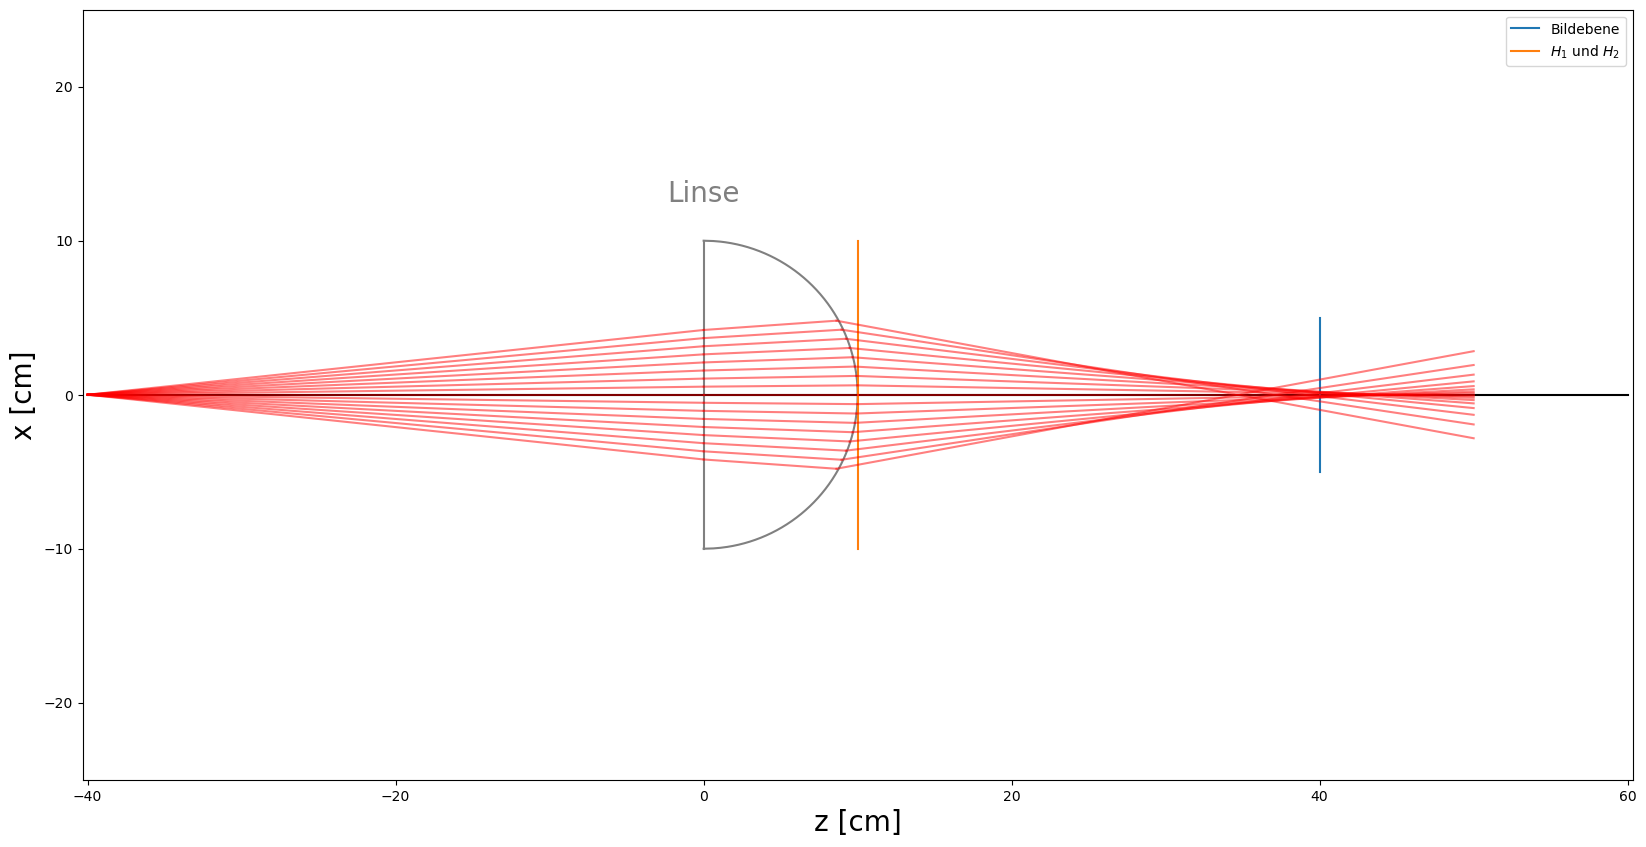

In [15]:
plt.figure(figsize=(20,10))

# Achsen
plt.axis("equal")
plt.xlim(zstart, zstop)
plt.ylim(-25, 25)
plt.xlabel("z [cm]", size=20)
plt.ylabel("x [cm]", size=20)

# Linse + Optischeachse
plt.text(0, R+R/4, "Linse", fontsize=20, color="gray", horizontalalignment="center")
plt.plot(zL, xL, color="gray")
plt.plot([0, 0], [xL_min, xL_max], color="gray")
plt.plot([zstart, zstop], [0, 0], color="black")

# Brennpunkte
#...

# Bildebene
plt.plot([b,b],[-5,5],label="Bildebene")

# Hauptebenen
plt.plot([h1,h1],[-10,10],label=r"$H_1$ und $H_2$")


# Strahlenbündel

for i in range(z1.shape[0]):
    plt.plot([z1[i], z2[i]], [x1[i], x2[i]], color="red", alpha=0.5)
    plt.plot([z2[i], z3[i]], [x2[i], x3[i]], color="red", alpha=0.5)
    plt.plot([z3[i], z4[i]], [x3[i], x4[i]], color="red", alpha=0.5)

plt.legend()


### Koeffizienten

In [12]:
alphas_grad = radToDegree(alphas)
Npol = 3
paras = np.polyfit(alphas_grad, x4, Npol) # y = p[0] * x^3 +p[1] *x^2 + p[2] * x^1 + p[3]

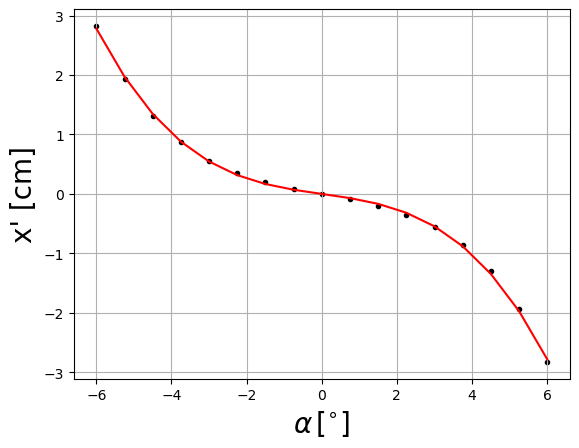

In [13]:
plt.figure()
plt.xlabel(r"$\alpha \, [{}^{\circ}]$", size=20)
plt.ylabel("x' [cm]", size=20)
plt.grid()
plt.scatter(alphas_grad, x4, color="black", marker=".")
plt.plot(alphas_grad, np.poly1d(paras)(alphas_grad), color="red")

In [14]:
print("A2 = %.4f cm grad^-1" % paras[Npol-1])
print("B4 = %.4f cm grad^-3" % paras[Npol-3])

A2 = -0.0877 cm grad^-1
B4 = -0.0104 cm grad^-3


### Was ist mit p[1] un p[3]?

p[1] und p[3] sind beide aufgrund der Symmetrie gleich null.
Schließlich entspräche p[1]!=0  einer konstanten Verschiebung des Bildes, dies würde die Zylindersymmetrie 
der Linse brechen. p[3]!=0 entspräche einer nicht konstanten Verschiebung, welche immer in die gleiche $\phi$-Richtung ist, auch dies Widerspricht der zylindersymmetrischen Natur des Problems. 

### Was passiert mit $A_2$ für eine dünne Linse?

Im Grenzwert $d\to0$ geht $A_2$ in die bekannte paraxiale Näherung über.